# Machine Learning Methods for Predicting Heart Failure
## Rithvin Koneru
Data from https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Collection
In order to train a model, first loaded in the requisite CSVs here.

In [ ]:
### DO NOT MODIFY THIS CELL ###
!git clone https://github.com/BigThinkAI/spring2022-project-data.git
!rm -rf ./spring2022-project-data/heart_failure_test.csv

DATA_CSV = '/content/spring2022-project-data/heart_failure_train.csv'

Cloning into 'spring2022-project-data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 12.33 KiB | 12.33 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# Your code here
df = pd.read_csv(DATA_CSV)
df.columns

Index(['Unnamed: 0', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Data Cleaning

Fixed formatting for age and converted 0 and 1 to Male and Female for Sex column.


In [ ]:
df['age'] = df['age'].apply(lambda x : int(x))

df['sex'] = df.sex.apply(lambda x: "M" if x == 1 else "F")
df.head(10)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,85,0,212,0,38,0,186000.0,0.90,136,M,0,187,0
1,1,52,0,3966,0,40,0,325000.0,0.90,140,M,1,146,0
2,2,45,0,308,1,60,1,377000.0,1.00,136,M,0,186,0
3,3,55,0,66,0,40,0,203000.0,1.00,138,M,0,233,0
4,4,60,0,1896,1,25,0,365000.0,2.10,144,F,0,172,1
5,5,60,1,104,1,30,0,389000.0,1.50,136,M,0,171,1
6,6,60,0,96,1,38,0,228000.0,0.75,140,F,0,95,0
7,7,50,1,167,1,45,0,362000.0,1.00,136,F,0,187,0
8,8,60,1,260,1,38,0,255000.0,2.20,132,F,1,45,1
9,9,55,0,748,0,45,0,263000.0,1.30,137,M,0,88,0


# Feature Engineering
General data explorations

General Stats

In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Spread of Ages

<Axes: >

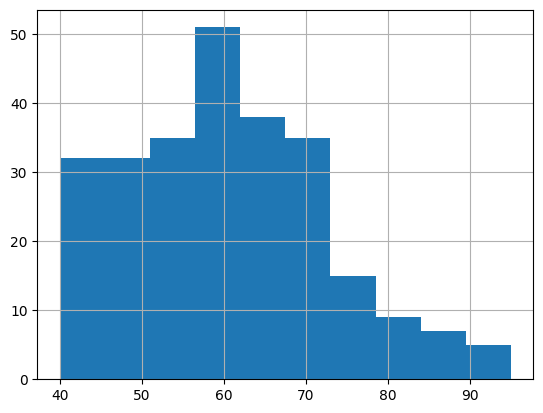

In [ ]:
df.age.hist()

# Spread of times between checkups of patients

<Axes: >

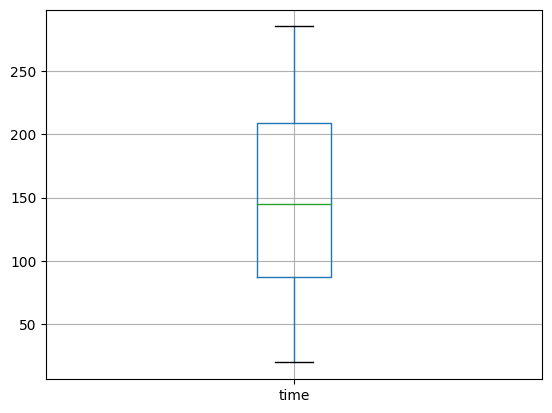

In [ ]:
df.boxplot(column = "time")

# Model Selection
Showcases variability of each patient data factor and inputs them into various models

In [ ]:

df_model = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']]
df_dum = pd.get_dummies(df_model) #dummy data with categories

#training model data
from sklearn.model_selection import train_test_split
X = df_dum.drop('DEATH_EVENT', axis =1)
y = df_dum.DEATH_EVENT.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model simulation 1 - linear regression model
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     15.02
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.65e-23
Time:                        06:20:22   Log-Likelihood:                -92.571
No. Observations:                 259   AIC:                             211.1
Df Residuals:                     246   BIC:                             257.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.8409      0.504      1.669      0.096      -0.151       1.833
age                          0.0059      0.002      2.991      0.003       0.002       0.010
anaemia                     -0.0196      0.047     -0.420      0.675      -0.111       0.072
creatinine_phosphokinase  2.318e-05   2.48e-05      0.936      0.350   -2.56e-05    7.19e-05
diabetes                     0.0349      0.046      0.759      0.448      -0.056       0.125
ejection_fraction           -0.0103      0.002     -5.120      0.000      -0.014      -0.006
high_blood_pressure         -0.0059      0.048     -0.122      0.903      -0.101       0.089
platelets                 1.004e-08   2.28e-07      0.044      0.965   -4.39e-07    4.59e-07
serum_creatinine             0.1037      0.024      4.325      0.000       0.056       0.151
serum_sodium                -0.0049      0.005     -0.905      0.367      -0.016       0.006
smoking                      0.0287      0.054      0.528      0.598      -0.078       0.136
time                        -0.0029      0.000     -8.664      0.000      -0.004      -0.002
sex_F                        0.4599      0.254      1.811      0.071      -0.040       0.960
sex_M                        0.3809      0.253      1.508      0.133      -0.116       0.878
==============================================================================
Omnibus:                        7.753   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.843
Skew:                           0.397   Prob(JB):                       0.0198
Kurtosis:                       2.691   Cond. No.                     3.34e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score # takes sample from model, runs model on sample, and checks if model is valid
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train, y_train, scoring = 'neg_mean_absolute_error', cv=4)) # comparison shows that prediction is around 30 percent off when predicting death

-0.2921585708925933

Running Lasso Regression and comparing when best/worst error term occurs

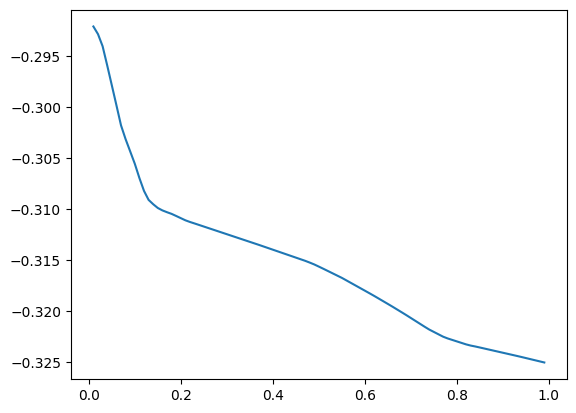

In [ ]:
lm_vals = Lasso()
np.mean(cross_val_score(lm_vals,X_train, y_train, scoring = 'neg_mean_absolute_error', cv=4)) # Using Lasso regression shows variability is correct, around 30 percent off
lm_vals.fit(X_train, y_train)
error = []
alpha = []
for i in range(1,100):
  alpha.append(i/100)
  lm_curr = Lasso(alpha=(i/100))
  error.append(np.mean(cross_val_score(lm_curr,X_train, y_train, scoring = 'neg_mean_absolute_error', cv=4)))

plt.plot(alpha,error) # plot shows that alpha = 0 has lowest mean absolute error across values from model

Trying Random Forest Model on data to see if error values improve

Result is that this model decreases error by a significant margin, by around 10-12% when comparing to previous model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randf = RandomForestRegressor()
randf.fit(X_train, y_train)
np.mean(cross_val_score(randf,X_train, y_train, scoring = 'neg_mean_absolute_error', cv=4))

-0.17647341628959276

# Tuning data to find most efficient model

In [ ]:

tp_lm = lm.predict(X_test)
tp_lml = lm_vals.predict(X_test)
tp_rf = randf.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(str(mean_absolute_error(y_test, tp_lm)) + " - Linear") # performance of Linear model

print(str(mean_absolute_error(y_test, tp_lml)) + " - Lasso") # performance of Lasso

print(str(mean_absolute_error(y_test, tp_rf)) + " - Random Forest") # performance of Random Forest

0.3010211428314767 - Linear
0.32097955757783947 - Lasso
0.17384615384615382 - Random Forest


In [ ]:
import pickle

def save_model(model, filename):
  with open(f'{filename}.pkl', 'wb') as f:
    pickle.dump(model, f)

  print(f'Model saved to {filename}.pkl!')